# Used Cars Price Prediction
### Regression Analysis of used car price

As per reports Cars growth of new cars in the upcoming 5 years is an average of 3.5% while for used cars 5% and the ratio of used cars to new cars is increasing continuously. So the used cars market is increasing day by day and a consumer wants the best resale price of his car.

 Import all libraries and modules used for data manipulation, visualization, and machine learning in Python

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_squared_error

# Set the color palette for seaborn
sns.set_palette("tab10")

# Set the style for seaborn plots
sns.set_style("whitegrid")

In [161]:
#Loading Data
data = pd.read_csv(r"C:\Users\Administrator\Downloads\sbnt\train (1).csv")

## Exploratory Data Analysis

In [162]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [163]:
data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [164]:
data.shape

(6019, 13)

#### Show the information in the dataset

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [93]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [94]:
data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

drop the coloumn "New_Price"

In [95]:
data.drop("New_Price" ,axis=1 ,inplace =True)

In [96]:
data.Name

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 6019, dtype: object

In [97]:
data.Name = data.Name.apply(lambda x :" ".join(x.split()[0:2]))

The purpose of this line of code is to transform each value in the 'Name' column by keeping only the first two words
#### - lambda x: " ".join(x.split()[0:2]): This lambda function processes each value x in the 'Name' column as follows:
   - x.split(): Splits the string x into a list of words based on whitespace.
   - x.split()[0:2]: Slices the list to get the first two words.
   - " ".join(...): Joins these two words back into a single string with a space in between.

In [98]:
data.Name.nunique()

216

In [99]:
data.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5550,Hyundai Creta,Coimbatore,2017,38271,Petrol,Manual,First,15.29 kmpl,1591 CC,121.3 bhp,5.0,12.53


Now showing value counts of mileage

In [100]:
data.Mileage.value_counts()

Mileage
18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
27.28 kmpl      1
14.57 kmpl      1
22.8 km/kg      1
8.0 kmpl        1
17.24 kmpl      1
Name: count, Length: 442, dtype: int64

note that there are null values 


In [101]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

Show the Mileage column missing values

In [102]:
data.Mileage.isna().sum()

2

In [103]:
data.drop(data[data.Mileage.isna()].index, inplace =True)

remember that Power have nan value 

- Identifying the Index of Rows with Missing Values:
- creates a boolean Series where each entry is True if the corresponding value in the 'Power' column is missing (NaN), and False otherwise.

In [104]:
index= data[data.Power.isna()].index  # include only the rows where the 'Power' column has missing values.
data[data.Power.isna()] # inspecting the actual rows that have missing values in the 'Power' column.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


In [105]:
data.drop(index ,inplace =True)

In [106]:
data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                6
Price                0
dtype: int64

In [107]:
data.Mileage =data.Mileage.apply(lambda x :  x.split()[0])
data.Mileage

0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
6014     28.4
6015     24.4
6016     14.0
6017     18.9
6018    25.44
Name: Mileage, Length: 5981, dtype: object

In [108]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,17.74


In [109]:
data.Power.str.contains("n").sum()

107

In [110]:
index =data[data.Power.str.contains("n")].index
data.drop(index ,inplace=True)

In [111]:
data.Engine.str.contains("N").sum()

0

In [112]:
data.Engine =data.Engine.apply(lambda x : x.split()[0])
data.Power =data.Power.apply(lambda x : x.split()[0])

In [27]:
data.dropna(subset=["Seats"] , inplace =True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 596.4+ KB


In [113]:
data.reindex(index= np.arange(0,5872))

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010.0,72000.0,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Skoda Superb,Mumbai,2017.0,35000.0,Diesel,Automatic,First,18.19,1968,174.5,5.0,25.75
5868,BMW 3,Kochi,2014.0,51240.0,Diesel,Automatic,First,8.2,2993,245,4.0,29.52
5869,Maruti Wagon,Kolkata,2011.0,37000.0,Petrol,Manual,Second,18.9,998,67.1,5.0,2.10
5870,Renault KWID,Kochi,2017.0,32587.0,Petrol,Manual,First,25.17,799,53.3,5.0,3.71


In [114]:
data= data.convert_dtypes()

In [115]:
data.Engine = data.Engine.astype("Int64")
data.Power = data.Power.astype("Float64")
data.Mileage = data.Mileage.astype("Float64")

##### Summary
- drop new_price that have 85% nan values
- there are nan values in data
- strip column name
- some columns have Zero entry
- Power column have "null bhp"
- delete string in numerical colums ["Power" , "Mileage"]
- drop nan values
- reindex data
- convert datatype of columns

In [116]:
data.sample(10 ,random_state =32) #the sampling process is reproducible # to get the same 10 rows 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4325,Toyota Corolla,Mumbai,2012,54000,Petrol,Automatic,First,14.53,1794,138.1,5,7.5
3554,Hyundai Verna,Kolkata,2014,19000,Petrol,Manual,First,17.43,1396,105.5,5,5.25
3774,Maruti Ciaz,Kochi,2018,10575,Petrol,Manual,First,21.56,1462,103.25,5,9.18
5856,Hyundai Elite,Chennai,2016,11000,Petrol,Manual,First,18.6,1197,81.86,5,7.95
3501,Toyota Corolla,Bangalore,2016,16471,Petrol,Manual,Second,14.28,1798,138.03,5,11.5
1233,Mercedes-Benz E-Class,Kochi,2017,36884,Diesel,Automatic,First,13.0,2143,204.0,5,32.25
969,Skoda Rapid,Ahmedabad,2015,60001,Diesel,Automatic,First,21.66,1498,103.52,5,7.25
1255,Maruti Swift,Hyderabad,2016,55746,Diesel,Manual,First,22.9,1248,74.0,5,6.95
3410,Land Rover,Ahmedabad,2012,60000,Diesel,Automatic,Second,12.35,2179,187.74,5,23.5
3766,Ford Ecosport,Mumbai,2017,15000,Petrol,Manual,First,18.88,999,123.24,5,8.0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   string 
 1   Location           5874 non-null   string 
 2   Year               5874 non-null   Int64  
 3   Kilometers_Driven  5874 non-null   Int64  
 4   Fuel_Type          5874 non-null   string 
 5   Transmission       5874 non-null   string 
 6   Owner_Type         5874 non-null   string 
 7   Mileage            5874 non-null   Float64
 8   Engine             5874 non-null   Int64  
 9   Power              5874 non-null   Float64
 10  Seats              5872 non-null   Int64  
 11  Price              5874 non-null   Float64
dtypes: Float64(3), Int64(4), string(5)
memory usage: 765.8 KB


## Exploratory Data Analysis - Visualization

###### - relation between [ "Mileage" ,"Engine","Power"] and Price ? 
###### -  The most expensive car?
###### - Best Selling Cars ?
###### -  Average car prices per type ?
###### - What kind of fuel do people prefer?
###### - The average price of cars relative to the location ?
###### - The average price of each car type for each Location ?
###### - correlation between Price and Kilometers_Driven ?
###### - Distribute of Transmission
###### - correlation between Price and Transmission ?

### relationships and distributions of variables in a dataset

 Creates a pairwise grid of scatter plots and histograms for all numeric columns in a DataFrame. It's a useful tool for exploratory data analysis, allowing us to visually assess the relationships and distributions of variables in a dataset

- Interpretation

Histograms on the Diagonal: Display the distribution of each variable.
Scatter Plots: Show potential relationships or correlations between pairs of variables. For example, a linear trend in a scatter plot might indicate a linear relationship between those two variables.

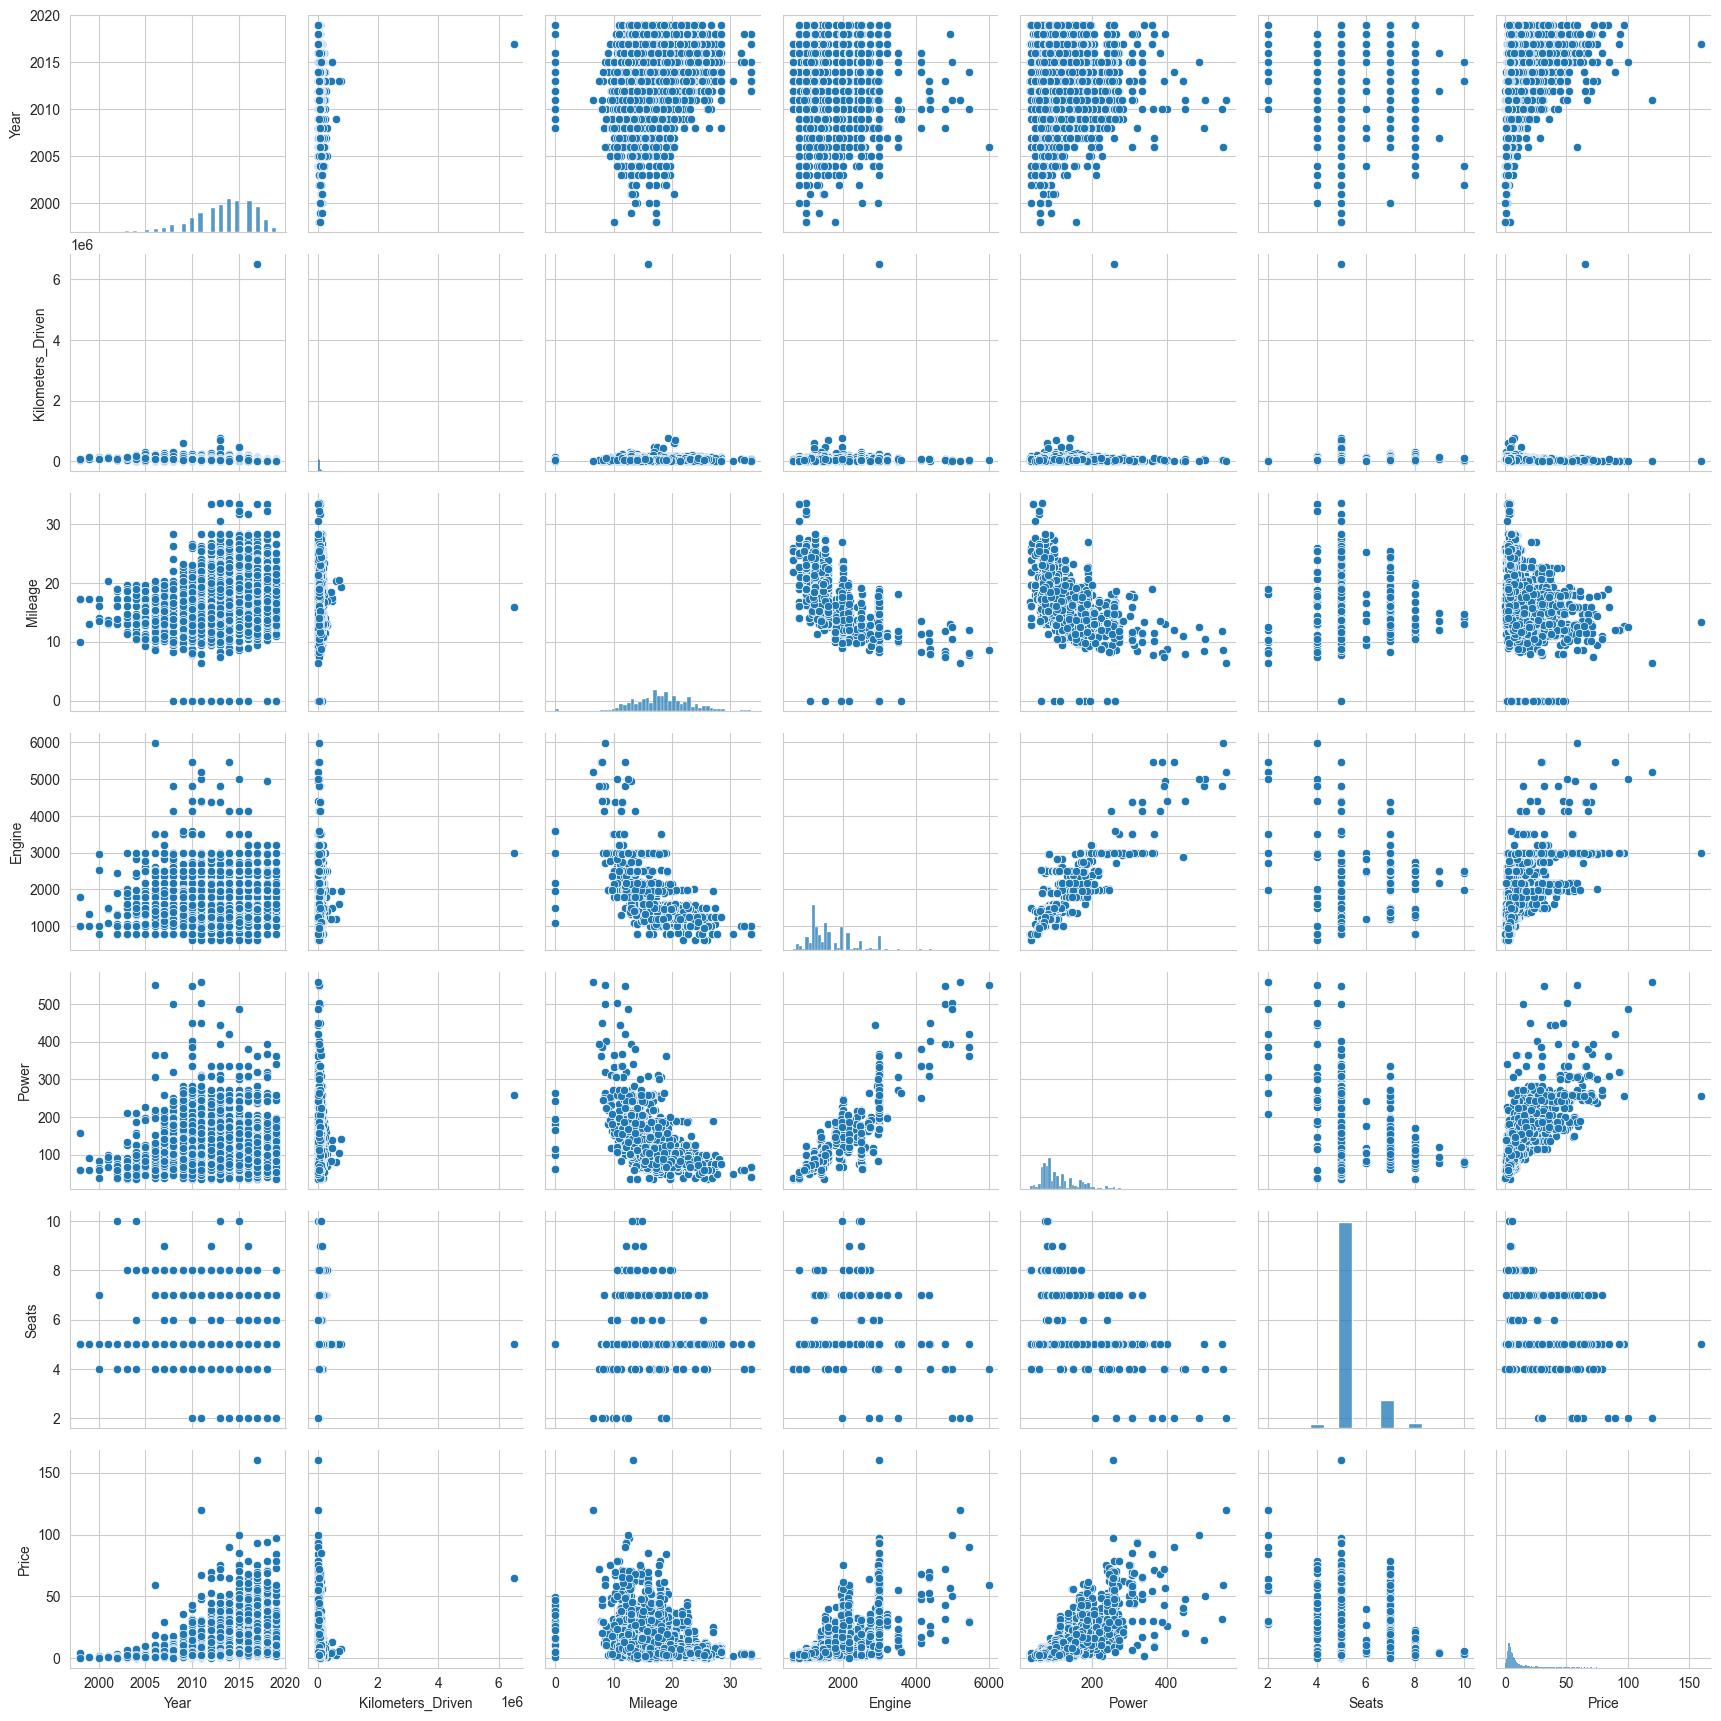

In [118]:
sns.pairplot(data) 

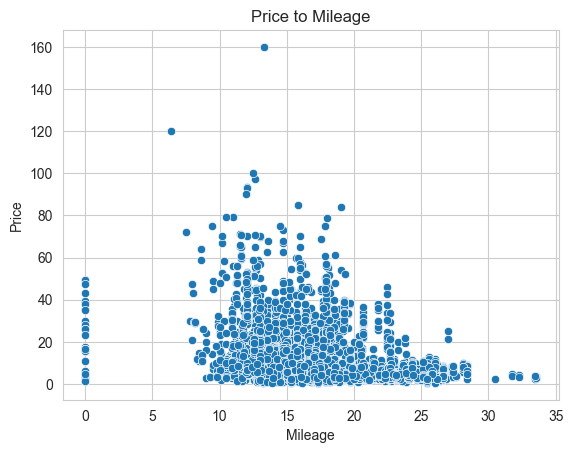

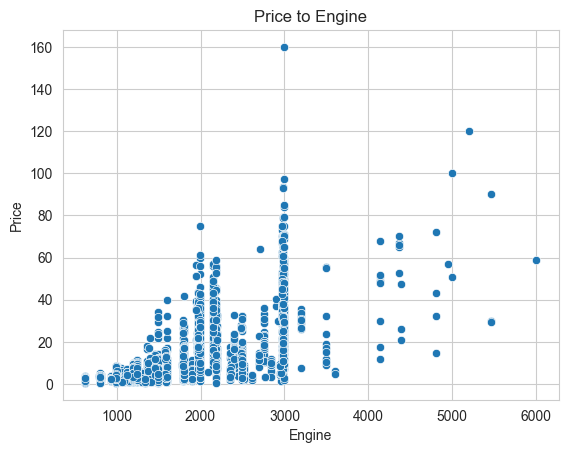

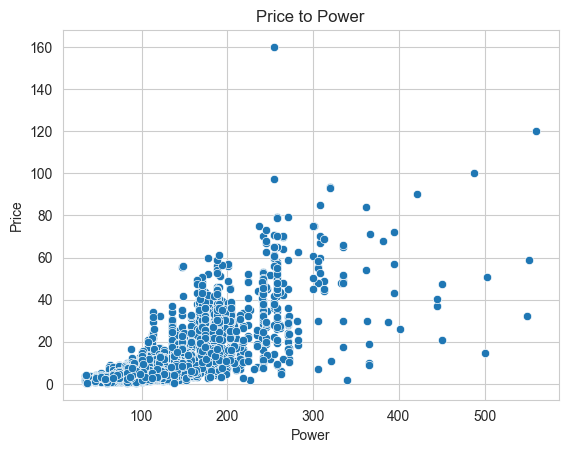

In [119]:
colums = ["Mileage","Engine","Power"]
for col in colums :
    plt.title(f"Price to {col}")
    sns.scatterplot(data = data , x=col ,y="Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

[]

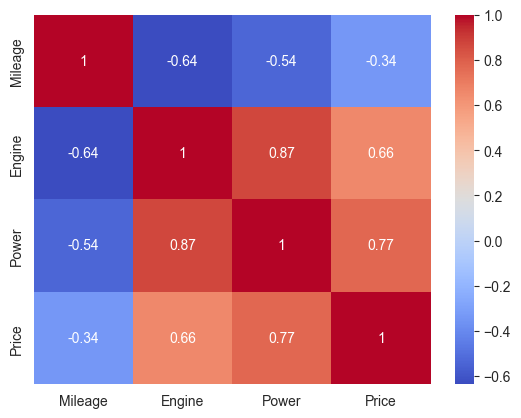

In [120]:
colums.append("Price")
first_corr_tabel=data[colums].corr()
sns.heatmap(first_corr_tabel,cmap="coolwarm",annot=True)
plt.plot()

The most expensive car

In [121]:
data.iloc[data.Price.argmax()]["Name"]

'Land Rover'

most expensive car is Land Rover

Best Selling Cars ?

In [122]:
data["Type"] = data.Name.apply(lambda x :x.split()[0])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10040\304508338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data.Type,palette = 'coolwarm')


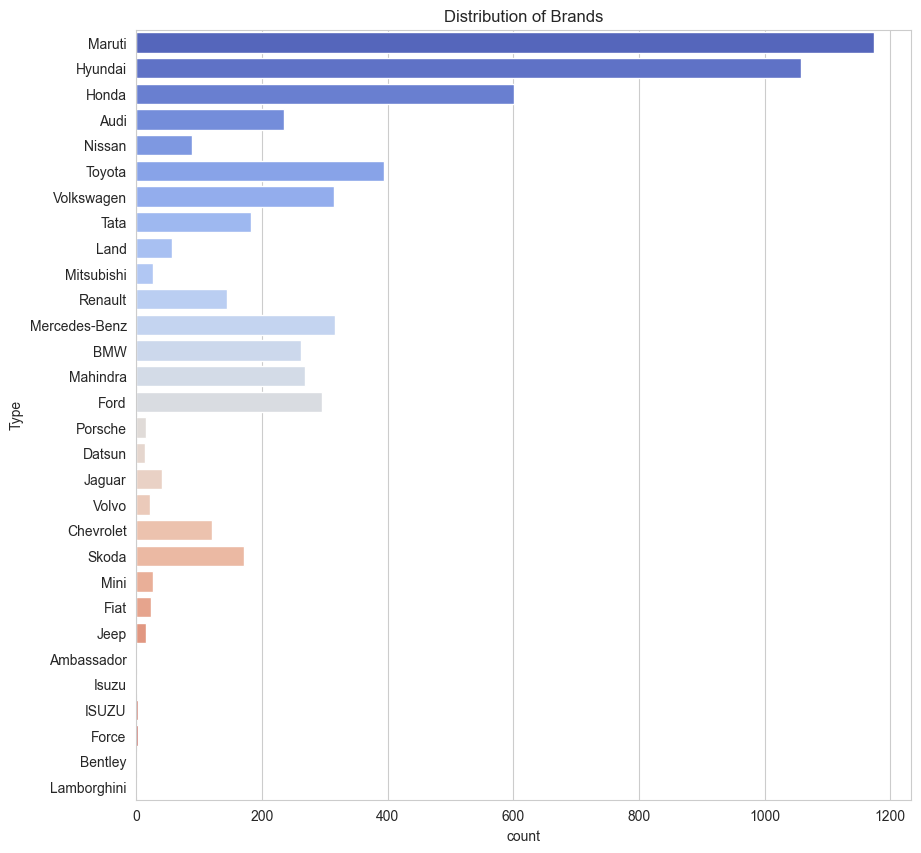

In [123]:
plt.figure(figsize=(10,10))
plt.title("Distribution of Brands")

sns.countplot(y=data.Type,palette = 'coolwarm')
plt.show()

In [124]:
pd.DataFrame(data.Type.value_counts()[:5])

,count
Type,
Maruti,1175
Hyundai,1058
Honda,601
Toyota,394
Mercedes-Benz,316


Average car prices per type ?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10040\3465357264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure = sns.barplot(data= data , x ="Type" ,y="Price",palette='coolwarm')


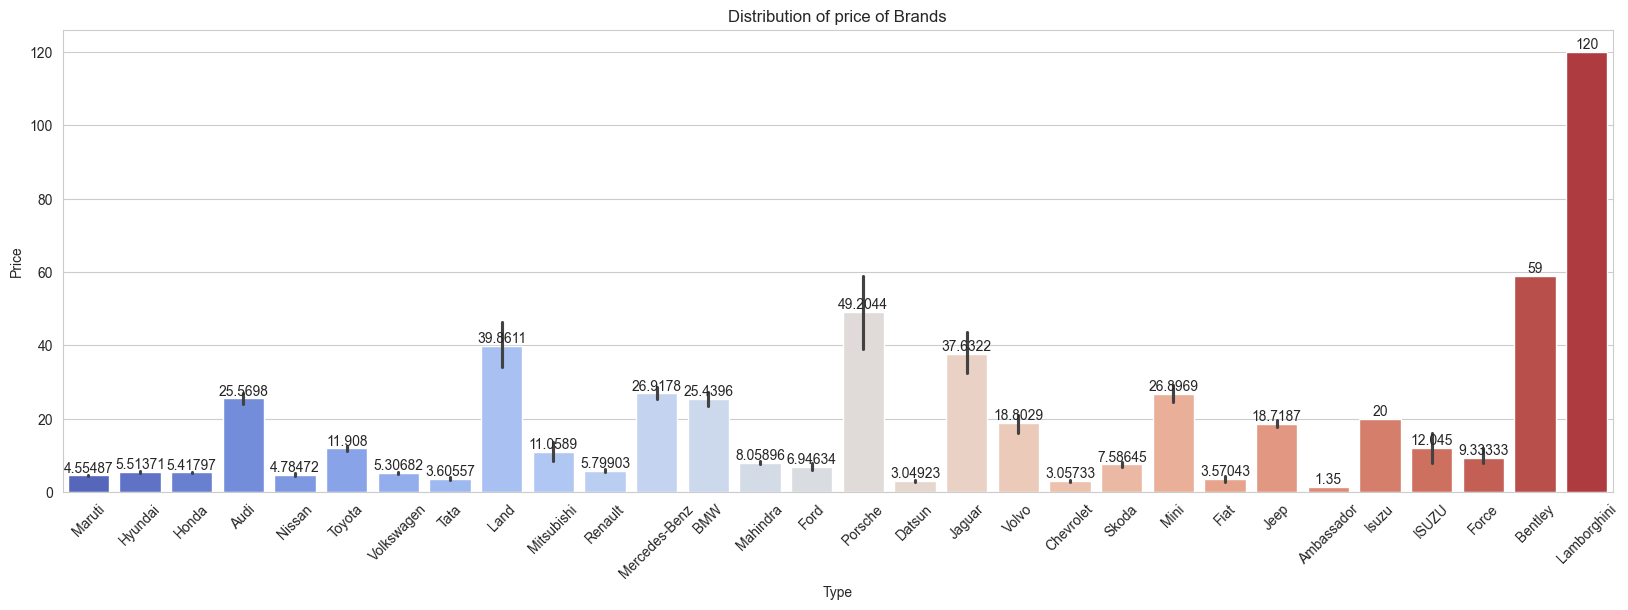

In [125]:

plt.figure(figsize=(20,6))
plt.title("Distribution of price of Brands")
figure = sns.barplot(data= data , x ="Type" ,y="Price",palette='coolwarm')
for contain in figure.containers :
    figure.bar_label(contain)
plt.xticks(rotation=45)
plt.show()

In [126]:
pd.DataFrame(np.round(data.groupby("Type")["Price"].mean(),2).sort_values(ascending=False))

,Price
Type,
Lamborghini,120.0
Bentley,59.0
Porsche,49.2
Land,39.86
Jaguar,37.63
Mercedes-Benz,26.92
Mini,26.9
Audi,25.57
BMW,25.44


What kind of fuel do people prefer?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10040\4172130229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =data , x= "Fuel_Type",palette='coolwarm')


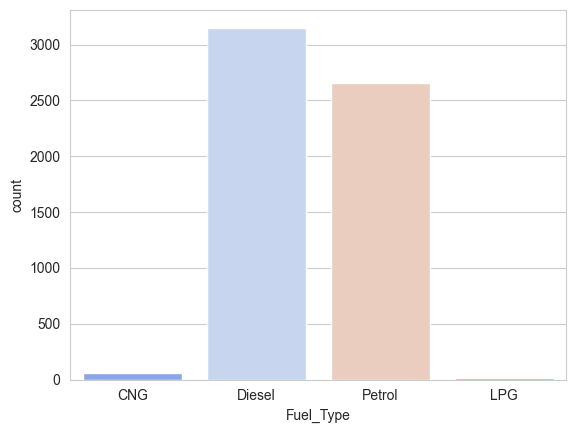

In [127]:
sns.countplot(data =data , x= "Fuel_Type",palette='coolwarm')
plt.show()

In [128]:
pd.DataFrame(data.Fuel_Type.value_counts())

,count
Fuel_Type,
Diesel,3153
Petrol,2656
CNG,55
LPG,10


In [129]:
data.iloc[data.Year.argmin()]["Name"]

'Maruti Zen'

In [130]:
data.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Type
1641,Nissan Sunny,Jaipur,2011,42000,Petrol,Manual,Second,16.95,1498,97.7,5,3.0,Nissan


The average price of cars relative to the location ?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10040\1534204204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data ,x= "Price",y="Location", palette='coolwarm')


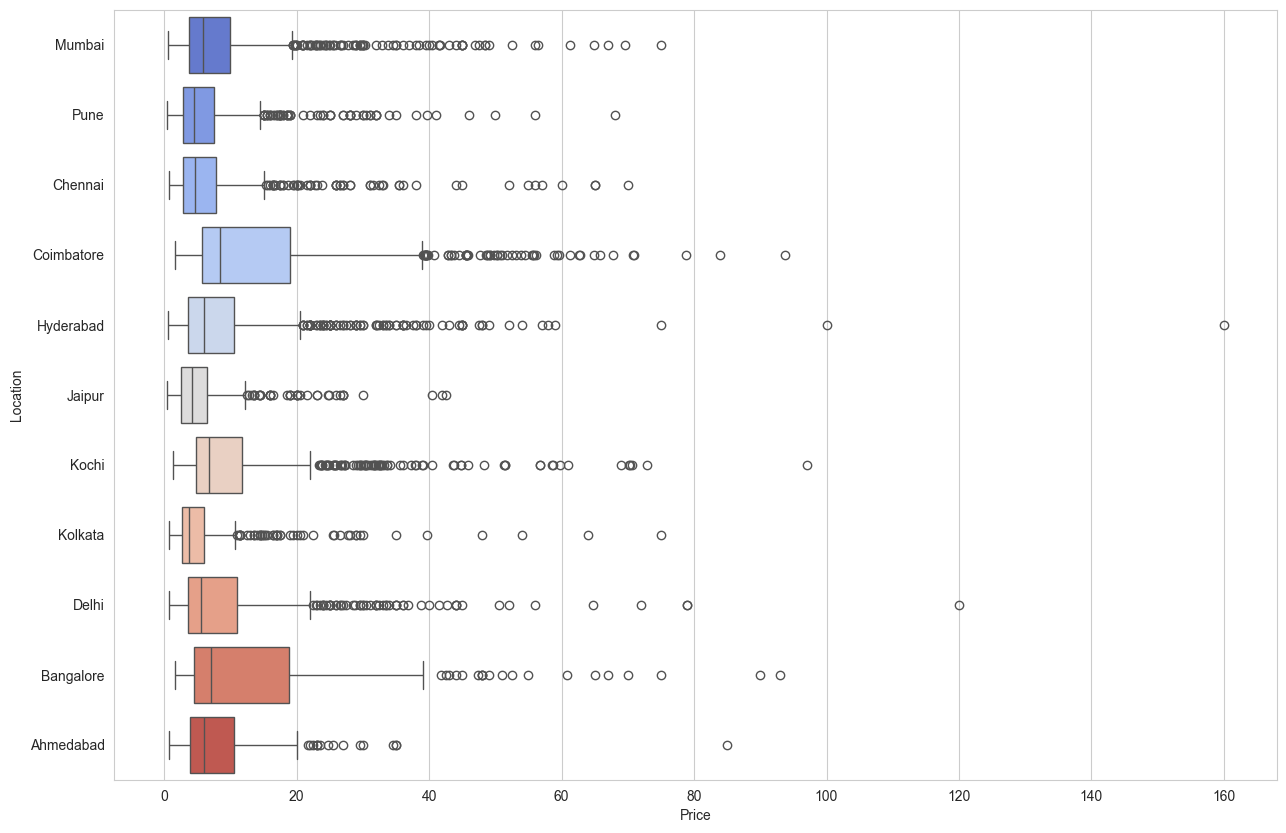

In [131]:
plt.figure(figsize=(15,10))
sns.boxplot(data= data ,x= "Price",y="Location", palette='coolwarm')
plt.show()

In [132]:
pd.DataFrame(np.round(data.groupby("Location")["Price"].mean(),2).sort_values(ascending=False))

,Price
Location,
Coimbatore,15.14
Bangalore,13.61
Kochi,11.24
Hyderabad,9.91
Delhi,9.78
Mumbai,9.44
Ahmedabad,8.52
Chennai,7.94
Pune,6.9


The average price of each car type for each Location ?

In [133]:
pd.crosstab( index=data["Type" ],columns=  data["Location"],values=data.Price
            ,aggfunc=["mean"]).fillna(0)

mean                                              \
Location       Ahmedabad  Bangalore    Chennai Coimbatore      Delhi   
Type                                                                   
Ambassador           0.0        0.0       1.35        0.0        0.0   
Audi                14.6  28.448438  26.694444    32.5294  19.034074   
BMW            24.560667  29.829091  28.157407  30.785152     20.935   
Bentley              0.0        0.0        0.0        0.0        0.0   
Chevrolet          3.525   3.978571   2.410769   4.589091   2.036667   
Datsun               0.0       2.88       2.75       3.31        0.0   
Fiat                 0.0        0.0      2.375       5.67       1.65   
Force                0.0        0.0       12.0        0.0        0.0   
Ford            5.716667   4.717059   5.949778  10.850625   8.202941   
Honda           5.620385   5.770385   4.915429   7.058049      4.368   
Hyundai         5.792826   6.474231   4.809718   7.874586   5.122472   
ISUZU                0.0        0.0        0.0      16.09        0.0   
Isuzu                0.0        0.0        0.0        0.0        0.0   
Jaguar               0.0  27.316667       26.5  31.955714       44.3   
Jeep                 0.0        0.0        0.0      21.55        0.0   
Lamborghini          0.0        0.0        0.0        0.0      120.0   
Land                20.5       49.5       16.5     50.393  34.211538   
Mahindra            8.84   7.213158   5.440455  10.668421   8.116875   
Maruti             4.597   4.811429   4.409677    6.24043   4.460268   
Mercedes-Benz     25.702  30.257059  23.613636  40.857917  23.366176   
Mini                22.0       27.0       22.0      19.41       22.0   
Mitsubishi           0.0    14.3475       4.82     21.765      10.51   
Nissan             4.075        6.5   4.226923      6.244   3.196667   
Porsche              0.0       75.0        0.0  52.186667      61.25   
Renault           4.4875   7.413846      5.575   8.118571   5.599167   
Skoda           9.016667   7.694444   5.466667   9.673333   6.997222   
Tata            3.077778    4.07875   2.518095   4.875909   4.742857   
Toyota         12.642222  13.504737    9.96375  15.082162  11.682923   
Volkswagen      5.033333   5.055625   5.720789   7.225185   3.683333   
Volvo               16.0       21.0      9.625      24.36       16.0   

                                                                      \
Location       Hyderabad     Jaipur      Kochi    Kolkata     Mumbai   
Type                                                                   
Ambassador           0.0        0.0        0.0        0.0        0.0   
Audi           27.628966     16.375    26.7712  14.978125    24.0896   
BMW            24.273939      27.15    31.3836    15.0875  23.521224   
Bentley             59.0        0.0        0.0        0.0        0.0   
Chevrolet          4.055      2.395     3.7225   2.353889   3.020833   
Datsun              2.99        0.0       3.54      2.675        0.0   
Fiat                4.55     2.2375       5.85     2.5225      4.325   
Force                0.0        0.0        0.0        8.0        0.0   
Ford            6.702909       4.76  10.497241   4.716364   6.802353   
Honda           6.546596   4.672051   6.798642   4.134583   5.328148   
Hyundai         4.817228   4.494762   6.309708   3.829375   5.403063   
ISUZU                0.0        8.0        0.0        0.0        0.0   
Isuzu                0.0       20.0        0.0        0.0        0.0   
Jaguar            50.125        0.0       35.2  22.066667      43.65   
Jeep                16.9       19.5      18.01      16.25       18.4   
Lamborghini          0.0        0.0        0.0        0.0        0.0   
Land               44.47       16.5   48.89625        0.0    29.0625   
Mahindra         7.57963   8.125294   8.985294    7.21381   7.644483   
Maruti          4.579586   3.742544   5.888632   3.631875   4.500142   
Mercedes-Benz  24.521786  21.520833  25.561053   23.07125  

Note

- you can see that location Affects the price
example
- Audi the distribute of car is more different in any Location
- you can find some car find in one Location
- Ambassador in China
- Lamborghini in Delhi
- Jaguar

In [134]:
data.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Type
2952,Tata Indigo,Pune,2015,83000,Diesel,Manual,First,19.09,1405,69.01,5,2.7,Tata


In [137]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

kilometers = data['Kilometers_Driven']
price = data['Price']

kilometers_reshaped = kilometers.values.reshape(-1, 1)

#
scaler = StandardScaler()

kilometers_scaled = scaler.fit_transform(kilometers_reshaped)

corr_coef, p_value = pearsonr(kilometers_scaled.flatten(), price)

# Output the results
print("Pearson correlation coefficient after scaling:", corr_coef)
print("P-value after scaling:", p_value)

Pearson correlation coefficient after scaling: -0.008298378118258651
P-value after scaling: 0.5248545776719099


Note

There is a significant correlation between the standardized 'Number of Kilometers' and the 'Price' of the vehicles in the dataset.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10040\2451479290.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["Transmission"],palette='coolwarm')


<Axes: xlabel='Transmission', ylabel='count'>

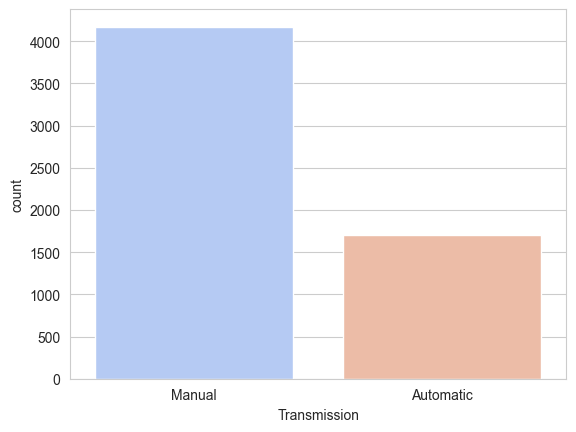

In [138]:
sns.countplot(x= data["Transmission"],palette='coolwarm')

In [139]:
from scipy.stats import f_oneway
#

Transmission_groups = [data[data['Transmission'] == category]['Price'] for category in data['Transmission'].unique()]

# Perform ANOVA test
anova_result = f_oneway(*Transmission_groups)

# Output the ANOVA test result
print("ANOVA F-value:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-value: 3065.848019563558
ANOVA p-value: 0.0


To test if there are significant differences in the mean 'Price' among different 'Transmission' types. Here’s how the ANOVA test results are interpreted:

- F-value: A higher F-value indicates a greater variance between group means relative to the variance within the groups, suggesting that the group means are different.
- p-value: If the p-value is less than a chosen significance level (e.g., 0.05), it suggests that there is a statistically significant difference in 'Price' among the different 'Transmission' categories.

There is a strong correlation between price and type transmission

### Data Preprocessing


Data Transformation

In [140]:
x = data.drop("Price" ,axis =1)
y= data["Price"]

In [141]:
nominal = ["Name" ,"Transmission","Location","Fuel_Type","Type"]
ordinal = ["Owner_Type"]
numerical = x.select_dtypes(["Int64","float64"]).columns

numerical column

In [142]:
x[numerical]= StandardScaler().fit_transform(x[numerical])

In [143]:
x

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Type
0,Maruti Wagon,Mumbai,-1.098160,0.148414,CNG,Manual,First,1.904608,-1.043572,-1.023083,-0.352441,Maruti
1,Hyundai Creta,Pune,0.481242,-0.188006,Diesel,Manual,First,0.319374,-0.072655,0.239987,-0.352441,Hyundai
2,Honda Jazz,Chennai,-0.782280,-0.133744,Petrol,Manual,First,-0.016888,-0.709404,-0.456150,-0.352441,Honda
3,Maruti Ertiga,Chennai,-0.466400,0.311198,Diesel,Manual,First,0.570998,-0.627940,-0.455036,2.131992,Maruti
4,Audi A4,Coimbatore,-0.150519,-0.191587,Diesel,Automatic,Second,-0.703137,0.569082,0.511016,-0.352441,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift,Delhi,0.165361,-0.335976,Diesel,Manual,First,2.316357,-0.627940,-0.729035,-0.352441,Maruti
6015,Hyundai Xcent,Jaipur,0.481242,0.452277,Diesel,Manual,First,1.401359,-0.840743,-0.784726,-0.352441,Hyundai
6016,Mahindra Xylo,Jaipur,-0.466400,-0.036074,Diesel,Manual,Second,-0.977637,1.450223,-0.023617,3.374208,Mahindra
6017,Maruti Wagon,Kolkata,-0.150519,-0.133744,Petrol,Manual,First,0.143236,-1.043572,-0.857124,-0.352441,Maruti


#### ordinal column

In [144]:
transformation = {
    "First":3,
    "Second":2,
    "Third":1,
    "Fourth & Above":0
}

x["Owner_Type"] = x["Owner_Type"].map(transformation)

#### Nominal column

In [145]:
import category_encoders as ce
binaryencoder = ce.BinaryEncoder(cols=nominal)
binaryencoder.fit(x)

BinaryEncoder(cols=['Name', 'Transmission', 'Location', 'Fuel_Type', 'Type'],
              mapping=[{'col': 'Name',
                        'mapping':       Name_0  Name_1  Name_2  Name_3  Name_4  Name_5  Name_6  Name_7
 1         0       0       0       0       0       0       0       1
 2         0       0       0       0       0       0       1       0
 3         0       0       0       0       0       0       1       1
 4         0       0       0       0       0       1       0       0
 5         0       0       0       0       0       1       0       1
...      ...     ...     ...     ...     ...     ...     ...     ...
 205       1       1       0       0       1       1       0       1
 206       1       1       0       0       1       1       1       0
 207       1       1       0       0       1       1       1       1
-1         0       0       0       0       0       0       0       0
-2         0       0       0       0       0       0       0       0

[209 rows x 8 columns]},
                       {'col': 'Transmission',
                        'mapping':     Transmission_0  Trans...
                       {'col': 'Fuel_Type',
                        'mapping':     Fuel_Type_0  Fuel_Type_1  Fuel_Type_2
 1            0            0            1
 2            0            1            0
 3            0            1            1
 4            1            0            0
-1            0            0            0
-2            0            0            0},
                       {'col': 'Type',
                        'mapping':      Type_0  Type_1  Type_2  Type_3  Type_4
 1        0       0       0       0       1
 2        0       0       0       1       0
 3        0       0       0       1       1
 4        0       0       1       0       0
 5        0       0       1       0       1
 6        0       0       1       1       0
 7        0       0       1       1       1
 8        0       1       0       0       0
 9        0       1       0       0       1
 10       0       1       0       1       0
 11       0       1       0       1       1
 12       0       1       1       0       0
 13       0       1       1       0       1
 14       0       1       1       1       0
 15       0       1       1       1       1
 16       1       0       0       0       0
 17       1       0       0       0       1
 18       1       0       0       1       0
 19       1       0       0       1       1
 20       1       0       1       0       0
 21       1       0       1       0       1
 22       1       0       1       1       0
 23       1       0       1       1       1
 24       1       1       0       0       0
 25       1       1       0       0       1
 26       1       1       0       1       0
 27       1       1       0       1       1
 28       1       1       1       0       0
 29       1       1       1       0       1
 30       1       1       1       1       0
-1        0       0       0       0       0
-2        0       0       0       0       0}])

In [146]:
x = binaryencoder.transform(x)

In [147]:
x

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Location_0,Location_1,...,Owner_Type,Mileage,Engine,Power,Seats,Type_0,Type_1,Type_2,Type_3,Type_4
0,0,0,0,0,0,0,0,1,0,0,...,3,1.904608,-1.043572,-1.023083,-0.352441,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,3,0.319374,-0.072655,0.239987,-0.352441,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0,...,3,-0.016888,-0.709404,-0.456150,-0.352441,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0,...,3,0.570998,-0.627940,-0.455036,2.131992,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0,1,...,2,-0.703137,0.569082,0.511016,-0.352441,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,1,1,0,1,1,0,...,3,2.316357,-0.627940,-0.729035,-0.352441,0,0,0,0,1
6015,0,0,1,0,0,0,0,1,0,1,...,3,1.401359,-0.840743,-0.784726,-0.352441,0,0,0,1,0
6016,1,0,0,0,1,0,0,0,0,1,...,2,-0.977637,1.450223,-0.023617,3.374208,0,1,1,1,0
6017,0,0,0,0,0,0,0,1,1,0,...,3,0.143236,-1.043572,-0.857124,-0.352441,0,0,0,0,1


In [155]:
##may need to delete

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib

# Define the features
numeric_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']
categorical_features = ['Name','Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Type']

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
#preprocessor.fit(x)
# Save the preprocessor to a file
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']

In [158]:
## to fit

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib
import pandas as pd

# Define features and target
x = data.drop("Price", axis=1)
y = data["Price"]

# Define the features
numeric_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Type']

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit the preprocessor on the training data
preprocessor.fit(x)

# Save the preprocessor to a file
joblib.dump(preprocessor, 'preprocessor2.pkl')


['preprocessor2.pkl']

In [151]:
print("Columns in training data:", x.columns.tolist())
#print("Columns in user input data:", user_input.columns.tolist())


Columns in training data: ['Name_0', 'Name_1', 'Name_2', 'Name_3', 'Name_4', 'Name_5', 'Name_6', 'Name_7', 'Location_0', 'Location_1', 'Location_2', 'Location_3', 'Year', 'Kilometers_Driven', 'Fuel_Type_0', 'Fuel_Type_1', 'Fuel_Type_2', 'Transmission_0', 'Transmission_1', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Type_0', 'Type_1', 'Type_2', 'Type_3', 'Type_4']


### Split Data

In [ ]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,random_state=42 ,shuffle=True ,test_size=.2)

In [ ]:
print(x_train.shape)

(4697, 29)


### Modeling

In [ ]:
model = LinearRegression()
model.fit(x_train ,y_train)

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(y_train,y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(y_test,y_test_predict))


acc of train 0.7244526052423219
acc of test 0.6932226070953733


In [ ]:
model = LinearRegression()
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model2.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.8868199038514647
acc of test 0.8688389930336844


In [ ]:
model = DecisionTreeRegressor(max_depth=6)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.8964820223191977
acc of test 0.8527440647458326


In [ ]:
model = DecisionTreeRegressor(max_depth=6,max_leaf_nodes=42)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.8843212689248328
acc of test 0.8504341230010803


In [ ]:
model = DecisionTreeRegressor(max_depth=6,max_leaf_nodes=42,max_features=50)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.8843212689248328
acc of test 0.8504341230010803


In [ ]:
model = RandomForestRegressor(n_estimators=100 , max_depth=6,max_leaf_nodes=42,max_features=50)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.90950063316656
acc of test 0.8779642637823285


In [ ]:
model = XGBRegressor(n_estimators=60 , max_depth=4)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))

      
y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.9690554738044739
acc of test 0.9345017671585083


#### To save the XGBRegressor model in to pickle

In [ ]:
import pickle

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model7, file)


In [ ]:
##to load the model
import pickle

# Load the model from the file
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict using the loaded model
y_test_predict_loaded = loaded_model.predict(x_test)
print('R^2 score of test (loaded model):', r2_score(np.log(y_test), y_test_predict_loaded))


R^2 score of test (loaded model): 0.9345017671585083


XGBRegressor gives the best accuracy for both train and test data splits

The output shows the R² scores for both the training and testing sets after fitting the XGBoost model on log-transformed target values.

#### XGBRegressor

#### Interpretation

1. **Training Accuracy (R² Score)**:
   ```
   acc of train: 0.9690554557032799
   ```
   - **R² Score**: The R² score of approximately 0.969 for the training data indicates that the model explains about 96.9% of the variance in the log-transformed target variable on the training set. This is a very high score, suggesting that the model fits the training data well.

2. **Testing Accuracy (R² Score)**:
   ```
   acc of test: 0.9345017853380554
   ```
   - **R² Score**: The R² score of approximately 0.935 for the testing data indicates that the model explains about 93.5% of the variance in the log-transformed target variable on the test set. This is also a very high score, indicating strong generalization performance on unseen data.

### Summary

- **XGBRegressor:High Performance**: Both R² scores are quite high, which suggests that the model is performing well both on the training and test sets. The small drop from training to test R² score indicates good generalization, meaning the model is likely not overfitting.
 